In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

C:\Users\aance\AppData\Local\Temp\ipykernel_10184\2037000736.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
blocks = gpd.read_file('./data/processedCensusBlocks-20240209T1320.geojson')
# blocks = gpd.read_file('./data/blocksWMinWalkDrivDistances_fromJerry3.geojson')
stations = gpd.read_file('./data/Fire_Stations.geojson')
# cityBounds = gpd.read_file('./data/Boundaries - City.geojson')

In [20]:
print(blocks.crs)
print(stations.crs)
print(cityBounds.crs)

epsg:4326
epsg:4326
epsg:4326


In [21]:
stations.to_crs(blocks.crs,inplace=True)
cityBounds.to_crs(blocks.crs,inplace=True)
assert blocks.crs.equals(stations.crs) and stations.crs.equals(cityBounds.crs)

In [22]:
assert not blocks['GEOID'].duplicated().any()
blocks.set_index('GEOID',inplace=True)

In [7]:
# filter fire stations for just those in Chicago
# cityBounds = gpd.read_file('./data/Boundaries - City.geojson')

In [24]:
# filter stations for only those in Chicago
print(stations.within(cityBounds.loc[0,'geometry']).sum(),len(stations))
stations = stations.loc[stations.within(cityBounds.loc[0,'geometry'])]

95 52184


In [19]:
# ax = blocks.plot()
# stations.plot(ax=ax,color='red')
stations.within(cityBounds.loc[0,'geometry']).sum()

95

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

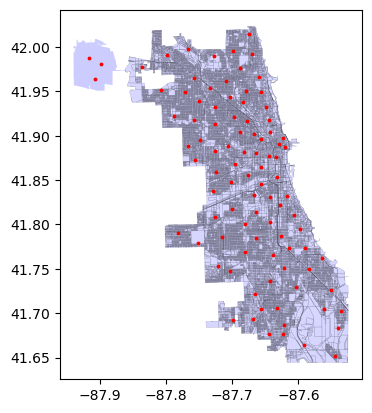

In [25]:
# make a plot of the city, census blocks, and stations
ax = cityBounds.plot(color='blue',alpha=0.2)
blocks.plot(ax=ax,color='white',edgecolor='black',linewidth=0.25,alpha=0.2)
stations.plot(ax=ax,color='red',markersize=3)

In [24]:
# find the closest (geodesically) fire station to each census block's centroid
def closestStation(blockCentroid):
    dists = stations.distance(blockCentroid)
    closest = dists.idxmin()
    return pd.Series({'station':closest,'dist':dists.loc[closest]})

blocks[['closestStation','distToStation']] = blocks.centroid.apply(closestStation)
blocks['closestStation'] = blocks['closestStation'].astype('category')

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\geoseries.py:574: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [ ]:
# Note: above cell took ~4 minutes to run, not too bad

In [10]:
blocks['distToStation'].describe()

count    38946.000000
mean      1007.377315
std        480.411833
min          2.902562
25%        664.005011
50%        972.555416
75%       1298.931914
max       3884.271152
Name: distToStation, dtype: float64

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

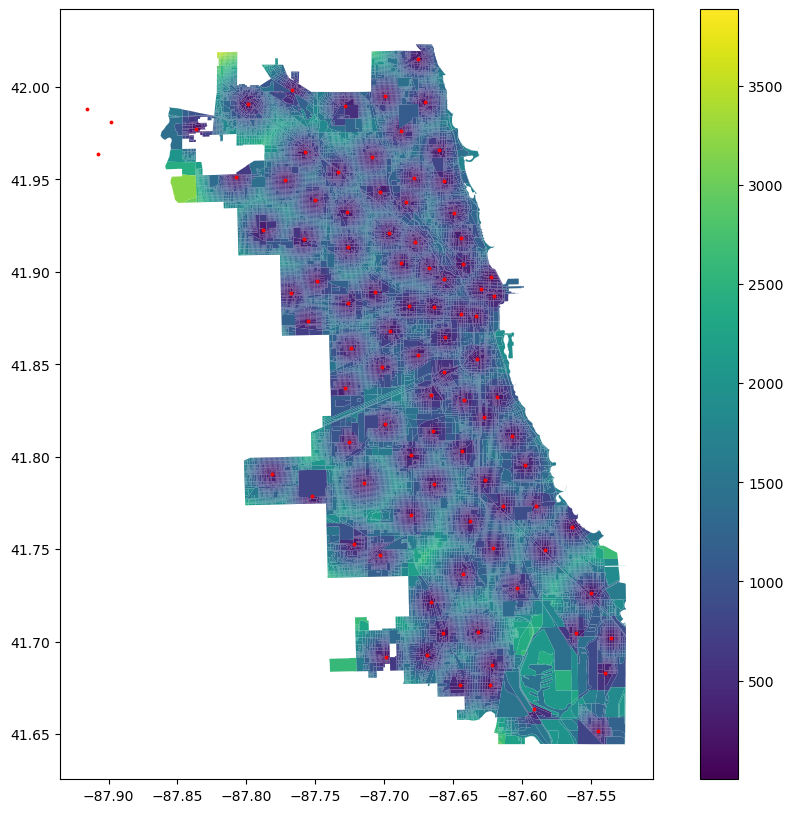

In [11]:
# plot the census blocks & fire stations, coloring blocks by distance to nearest station
ax = blocks.plot('distToStation',legend=True,figsize=(12,10))
stations.plot(color='red',markersize=3,ax=ax)

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

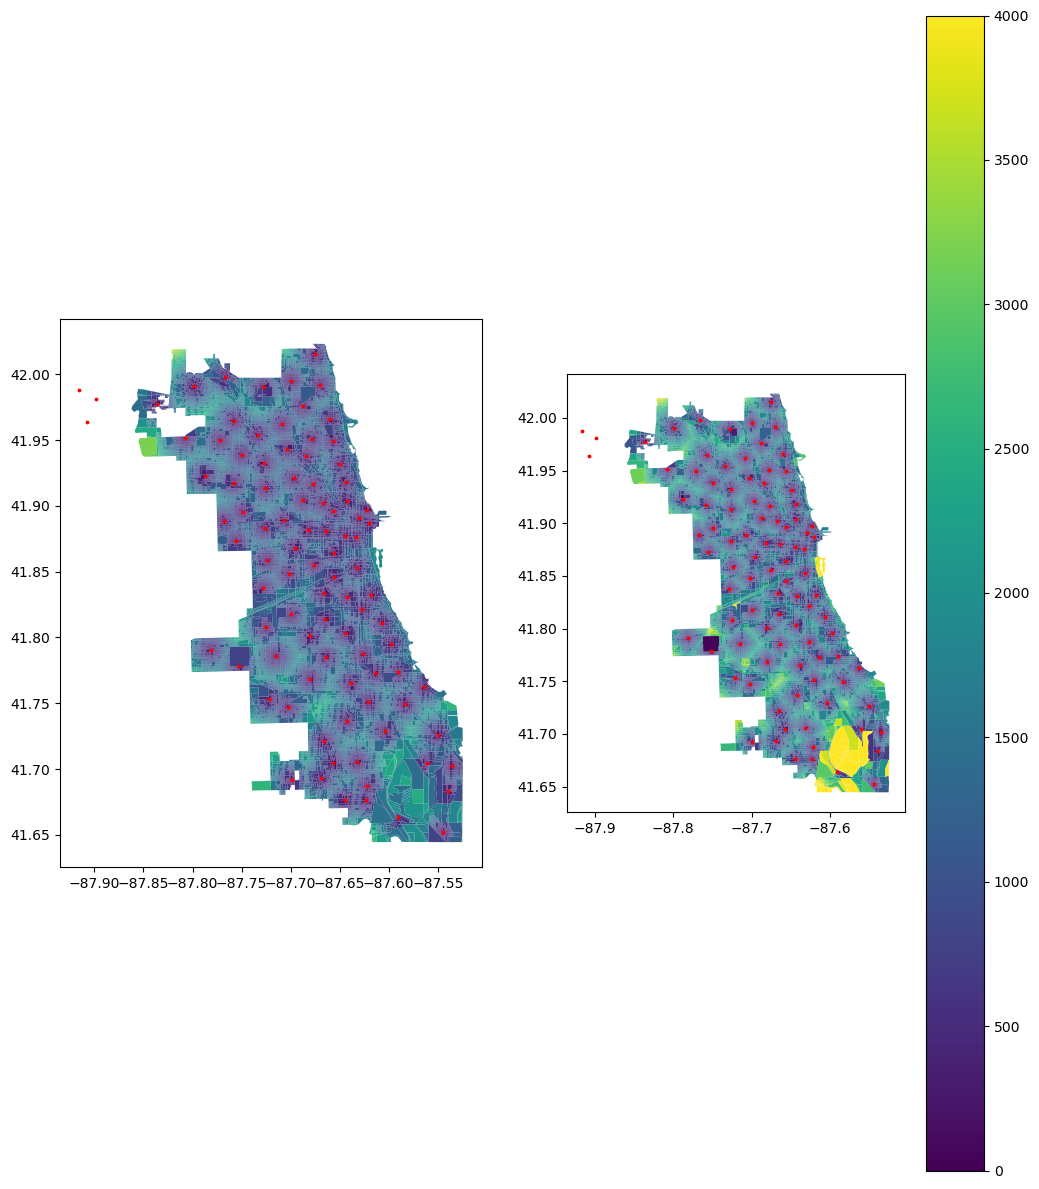

In [26]:
fig,(lax,rax) = plt.subplots(nrows=1,ncols=2,figsize=(12,15))

blocks.plot('distToStation',ax=lax,legend=False,vmax=4000)
stations.plot(color='red',markersize=3,ax=lax)

blocks.plot('distance_to_nearest_station',ax=rax,legend=True,vmax=4000)
stations.plot(color='red',markersize=3,ax=rax)

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


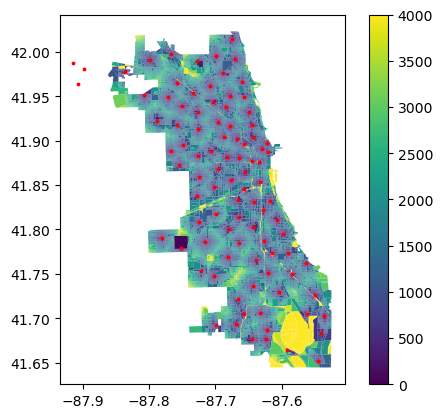

In [18]:
ax = blocks.plot('distance_to_nearest_station',legend=True,vmax=4000)
stations.plot(color='red',markersize=3,ax=ax)
plt.savefig('distToNearestStation.pdf')

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

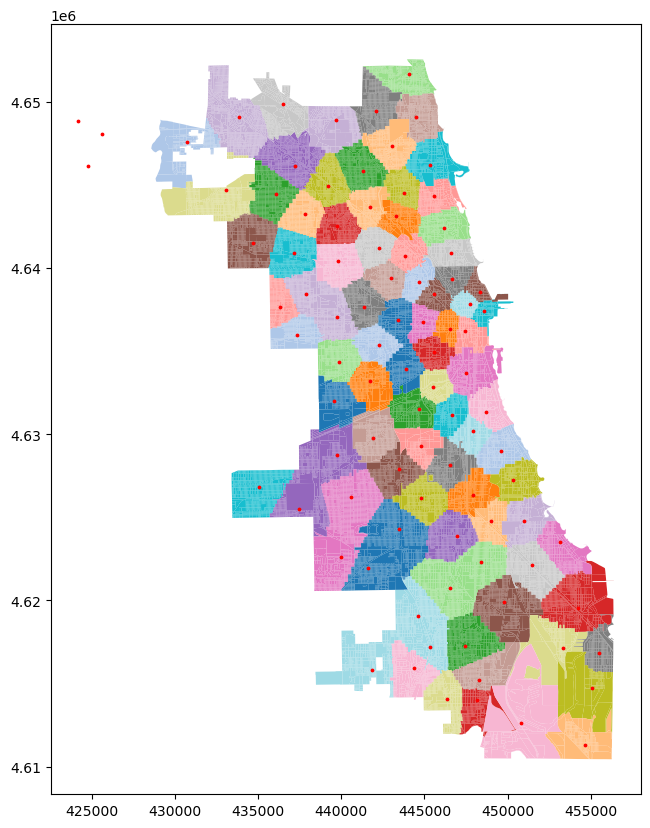

In [26]:
# plot the census blocks & fire stations, coloring blocks by which station they matched with
ax = blocks.plot('closestStation',figsize=(12,10),cmap='tab20')
stations.plot(color='red',markersize=3,ax=ax)

In [ ]:
blocks.head()

In [91]:
# okay, so we've got what we want. Let's prep the data to send to Jerry
blocks.to_crs('epsg:4326',inplace=True)
stations.to_crs('epsg:4326',inplace=True)

blocks['closestStation'] = blocks['closestStation'].astype(float)
blocks['centroidLat'] = blocks.centroid.y
blocks['centroidLon'] = blocks.centroid.x
blocks['stationLat'] = stations.loc[blocks['closestStation'],'geometry'].y.to_numpy()
blocks['stationLon'] = stations.loc[blocks['closestStation'],'geometry'].x.to_numpy()

blocks.to_file('./data/censusBlocksAndClosestFireStations-20240212T1545.geojson',driver='GeoJSON')

C:\Users\aance\AppData\Local\Temp\ipykernel_21088\1112002663.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  blocks['centroidLat'] = blocks.centroid.y
C:\Users\aance\AppData\Local\Temp\ipykernel_21088\1112002663.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  blocks['centroidLon'] = blocks.centroid.x
